In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/LR模型驗證"

# **關係全特徵(不包含右殼長)LR模型驗證(sklearn.linear_model)**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 載入資料數據集
df = pd.read_csv("/content/drive/MyDrive/OysterData_測試數據集_40筆.csv")
df

In [ ]:
import cv2
from pandas.core.common import flatten
from imutils import paths #路徑檔案管理

In [ ]:
# 載入資料特徵
df_x = df.drop(['牡蠣索引 Oyster Index',	'牡蠣編號 Oyster number' ,'牡蠣原始編號 Oyster Original Number', '肉重 Meat Weight', "雜質重 Impurity Weight", '肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%)', '殼重 Shell Weight'], axis=1)

df_x

,殼長 Shell Length,殼寬 Shell Width,殼高 Shell Height,面積 Area,體積 Volume,總重量 Total Weight
0,6.8,4.8,3.7,32.64,120.768,37.7
1,8.1,4.1,2.4,33.21,79.704,33.0
2,8.9,5.2,2.8,46.28,129.584,55.7
3,8.2,6.2,3.1,50.84,157.604,57.7
4,8.6,4.7,2.8,40.42,113.176,36.1
5,7.1,4.9,3.2,34.79,111.328,41.3
6,6.8,6.2,2.2,42.16,92.752,37.7
7,7.3,4.5,2.2,32.85,72.270,31.0
8,7.4,5.7,2.2,42.18,92.796,56.5
9,6.6,5.8,2.5,38.28,95.700,53.5


In [ ]:
data_x = df_x.iloc[:,:].values

In [ ]:
data_x

array([[  6.8  ,   4.8  ,   3.7  ,  32.64 , 120.768,  37.7  ],
       [  8.1  ,   4.1  ,   2.4  ,  33.21 ,  79.704,  33.   ],
       [  8.9  ,   5.2  ,   2.8  ,  46.28 , 129.584,  55.7  ],
       [  8.2  ,   6.2  ,   3.1  ,  50.84 , 157.604,  57.7  ],
       [  8.6  ,   4.7  ,   2.8  ,  40.42 , 113.176,  36.1  ],
       [  7.1  ,   4.9  ,   3.2  ,  34.79 , 111.328,  41.3  ],
       [  6.8  ,   6.2  ,   2.2  ,  42.16 ,  92.752,  37.7  ],
       [  7.3  ,   4.5  ,   2.2  ,  32.85 ,  72.27 ,  31.   ],
       [  7.4  ,   5.7  ,   2.2  ,  42.18 ,  92.796,  56.5  ],
       [  6.6  ,   5.8  ,   2.5  ,  38.28 ,  95.7  ,  53.5  ],
       [  7.6  ,   5.2  ,   3.   ,  39.52 , 118.56 ,  53.6  ],
       [  6.1  ,   4.8  ,   2.8  ,  29.28 ,  81.984,  37.7  ],
       [  7.1  ,   5.   ,   2.2  ,  35.5  ,  78.1  ,  35.1  ],
       [  8.4  ,   4.8  ,   1.6  ,  40.32 ,  64.512,  38.7  ],
       [ 10.3  ,   4.8  ,   2.7  ,  49.44 , 133.488,  56.8  ],
       [  7.8  ,   5.8  ,   3.2  ,  45.24 , 144.768,  3

In [ ]:
len(data_x)

40

In [ ]:
len(data_x[0])

6

In [ ]:
x = np.array(data_x)
y = df.iloc[:,-1].values

In [ ]:
x

array([[  6.8  ,   4.8  ,   3.7  ,  32.64 , 120.768,  37.7  ],
       [  8.1  ,   4.1  ,   2.4  ,  33.21 ,  79.704,  33.   ],
       [  8.9  ,   5.2  ,   2.8  ,  46.28 , 129.584,  55.7  ],
       [  8.2  ,   6.2  ,   3.1  ,  50.84 , 157.604,  57.7  ],
       [  8.6  ,   4.7  ,   2.8  ,  40.42 , 113.176,  36.1  ],
       [  7.1  ,   4.9  ,   3.2  ,  34.79 , 111.328,  41.3  ],
       [  6.8  ,   6.2  ,   2.2  ,  42.16 ,  92.752,  37.7  ],
       [  7.3  ,   4.5  ,   2.2  ,  32.85 ,  72.27 ,  31.   ],
       [  7.4  ,   5.7  ,   2.2  ,  42.18 ,  92.796,  56.5  ],
       [  6.6  ,   5.8  ,   2.5  ,  38.28 ,  95.7  ,  53.5  ],
       [  7.6  ,   5.2  ,   3.   ,  39.52 , 118.56 ,  53.6  ],
       [  6.1  ,   4.8  ,   2.8  ,  29.28 ,  81.984,  37.7  ],
       [  7.1  ,   5.   ,   2.2  ,  35.5  ,  78.1  ,  35.1  ],
       [  8.4  ,   4.8  ,   1.6  ,  40.32 ,  64.512,  38.7  ],
       [ 10.3  ,   4.8  ,   2.7  ,  49.44 , 133.488,  56.8  ],
       [  7.8  ,   5.8  ,   3.2  ,  45.24 , 144.768,  3

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x.shape

(40, 6)

In [ ]:
y

array([ 7.2,  8.4, 10. ,  7.9,  5.5,  8.4,  7.2,  7.7, 13.7, 12. , 10.7,
        8.7,  9.1,  9.7,  9.7,  6.9,  7.2,  6.9,  5.8,  7.1,  6. ,  5.6,
        6.3,  9.6,  5.2, 11.9,  7.8,  9.4,  6.9,  8.2,  9.3,  8.6,  7.6,
       10.4,  6.3,  5.6,  9.3,  6.2,  6.8,  5.1])

In [ ]:
type(y)

numpy.ndarray

In [ ]:
# tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.experimental import LinearModel
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend

import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras import backend as K
from keras import models

In [ ]:
# 整數轉浮點數
x = x.astype('float32')

print('x shape:', x.shape)
print(x.shape[0], ' samples')


x shape: (40, 6)
40  samples


In [ ]:
x

array([[  6.8  ,   4.8  ,   3.7  ,  32.64 , 120.768,  37.7  ],
       [  8.1  ,   4.1  ,   2.4  ,  33.21 ,  79.704,  33.   ],
       [  8.9  ,   5.2  ,   2.8  ,  46.28 , 129.584,  55.7  ],
       [  8.2  ,   6.2  ,   3.1  ,  50.84 , 157.604,  57.7  ],
       [  8.6  ,   4.7  ,   2.8  ,  40.42 , 113.176,  36.1  ],
       [  7.1  ,   4.9  ,   3.2  ,  34.79 , 111.328,  41.3  ],
       [  6.8  ,   6.2  ,   2.2  ,  42.16 ,  92.752,  37.7  ],
       [  7.3  ,   4.5  ,   2.2  ,  32.85 ,  72.27 ,  31.   ],
       [  7.4  ,   5.7  ,   2.2  ,  42.18 ,  92.796,  56.5  ],
       [  6.6  ,   5.8  ,   2.5  ,  38.28 ,  95.7  ,  53.5  ],
       [  7.6  ,   5.2  ,   3.   ,  39.52 , 118.56 ,  53.6  ],
       [  6.1  ,   4.8  ,   2.8  ,  29.28 ,  81.984,  37.7  ],
       [  7.1  ,   5.   ,   2.2  ,  35.5  ,  78.1  ,  35.1  ],
       [  8.4  ,   4.8  ,   1.6  ,  40.32 ,  64.512,  38.7  ],
       [ 10.3  ,   4.8  ,   2.7  ,  49.44 , 133.488,  56.8  ],
       [  7.8  ,   5.8  ,   3.2  ,  45.24 , 144.768,  3

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x.shape

(40, 6)

In [ ]:
y

array([ 7.2,  8.4, 10. ,  7.9,  5.5,  8.4,  7.2,  7.7, 13.7, 12. , 10.7,
        8.7,  9.1,  9.7,  9.7,  6.9,  7.2,  6.9,  5.8,  7.1,  6. ,  5.6,
        6.3,  9.6,  5.2, 11.9,  7.8,  9.4,  6.9,  8.2,  9.3,  8.6,  7.6,
       10.4,  6.3,  5.6,  9.3,  6.2,  6.8,  5.1])

In [ ]:
import pickle

In [ ]:
# load the model from disk
%%time
model = pickle.load(open("/content/drive/MyDrive/20240515_sklearn_linear_model_OriginalData(130)_AllFeature_UnincludeRightShellLength.sav", 'rb'))
result = model.score(x, y) #R^2


CPU times: user 57.9 ms, sys: 9.5 ms, total: 67.5 ms
Wall time: 481 ms


In [ ]:
#R^2
result

-0.05415303568038987

In [ ]:
# 每一筆資料預測值
y_pred = model.predict(x)
y_pred

array([ 8.225788 ,  8.24895  , 13.563642 , 13.189436 ,  8.196672 ,
        9.557718 ,  8.536667 ,  7.992696 , 14.459524 , 12.98929  ,
       12.901156 ,  9.381441 ,  8.838249 , 10.578339 , 13.724155 ,
        7.796132 ,  8.40649  ,  8.884674 ,  7.473444 ,  8.586935 ,
        9.056305 ,  7.1278076,  7.3210583, 10.906545 ,  7.369027 ,
       13.312414 ,  9.275928 , 13.775673 ,  8.590635 ,  7.8948526,
       10.306653 , 13.218476 ,  9.064147 ,  9.77121  ,  8.404579 ,
        4.528866 ,  9.468624 ,  6.480215 ,  7.699978 ,  6.1514244],
      dtype=float32)

In [ ]:
# 模型效能評估指標
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

print("=================TEST=================")
# mae
print("MAE:", mean_absolute_error(y, y_pred))
# mse
print("MSE:", mean_squared_error(y, y_pred))
# rmse
n = mean_squared_error(y, y_pred)
x = math.sqrt(n)
print("RMSE:", x)
# msle
print("MSLE:", mean_squared_log_error(y, y_pred))
#median_absolute_error
print("MEDAE:", median_absolute_error(y, y_pred))
# R^2
print("R^2:", r2_score(y, y_pred))


=================TEST=================
MAE: 1.6047890663146973
MSE: 4.130692081857134
RMSE: 2.032410411766564
MSLE: 0.03985854308978158
MEDAE: 1.256517505645752
R^2: -0.05415303568038987


In [ ]:
# 每一筆資料之準確值、預測值與誤差值
print("    準確值    預測值         誤差值   ")
for ii in range(len(y_pred)):
  print( "  " + str(ii) + "  " + str(y[ii])  + "  "  + str(y_pred[ii])  + "    "  + str(y[ii] - y_pred[ii]) )

    準確值    預測值         誤差值   
  0  7.2  8.225788    -1.025788116455078
  1  8.4  8.24895    0.15104999542236364
  2  10.0  13.563642    -3.5636415481567383
  3  7.9  13.189436    -5.289435958862304
  4  5.5  8.196672    -2.6966724395751953
  5  8.4  9.557718    -1.1577182769775387
  6  7.2  8.536667    -1.3366668701171873
  7  7.7  7.992696    -0.29269580841064435
  8  13.7  14.459524    -0.7595241546630866
  9  12.0  12.98929    -0.9892902374267578
  10  10.7  12.901156    -2.201156425476075
  11  8.7  9.381441    -0.6814411163330085
  12  9.1  8.838249    0.2617507934570309
  13  9.7  10.578339    -0.8783386230468757
  14  9.7  13.724155    -4.024155426025391
  15  6.9  7.796132    -0.8961320877075192
  16  7.2  8.40649    -1.2064903259277342
  17  6.9  8.884674    -1.9846740722656246
  18  5.8  7.473444    -1.6734439849853517
  19  7.1  8.586935    -1.4869350433349613
  20  6.0  9.056305    -3.056304931640625
  21  5.6  7.1278076    -1.5278076171875004
  22  6.3  7.3210583    -1.021

In [ ]:
# 模型效能評估指標 MAPE 與 1-MAPE
y_abs_s = 0
for k in range(len(y)):
  yy = (y[k] - y_pred[k])/y[k]
  y_abs = abs(yy)
  print(str(k) + "  " + str(yy) + "  " + str(y_abs))
  y_abs_s = y_abs_s + y_abs
  print(y_abs_s)

print(y_abs_s)
print("誤差率 :", y_abs_s/len(y))
print("正確率 :", 1-(y_abs_s/len(y)))

0  -0.14247057172987193  0.14247057172987193
0.14247057172987193
1  0.017982142312186148  0.017982142312186148
0.16045271404205808
2  -0.35636415481567385  0.35636415481567385
0.5168168688577319
3  -0.6695488555521903  0.6695488555521903
1.1863657244099222
4  -0.49030407992276276  0.49030407992276276
1.6766698043326849
5  -0.13782360440208793  0.13782360440208793
1.8144934087347728
6  -0.1856481764051649  0.1856481764051649
2.0001415851399376
7  -0.03801244265073303  0.03801244265073303
2.0381540277906707
8  -0.05543971931847348  0.05543971931847348
2.093593747109144
9  -0.08244085311889648  0.08244085311889648
2.1760346002280406
10  -0.20571555378281076  0.20571555378281076
2.3817501540108514
11  -0.07832656509574812  0.07832656509574812
2.4600767191065995
12  0.028763823456816582  0.028763823456816582
2.488840542563416
13  -0.0905503735099872  0.0905503735099872
2.5793909160734034
14  -0.41486138412632906  0.41486138412632906
2.9942523001997325
15  -0.12987421560978538  0.12987421560

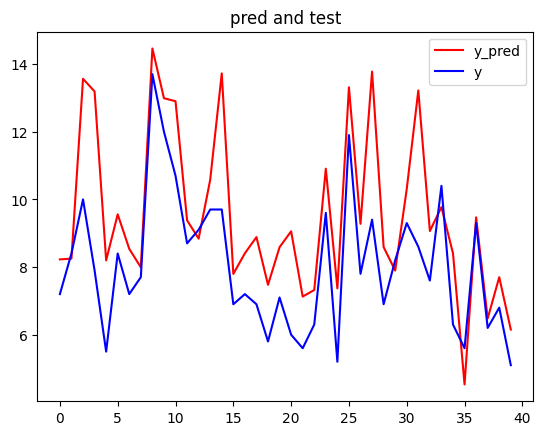

In [ ]:
# 預測值與其對應實際值折線圖
item = range(len(y))


plt.plot(item, y_pred, 'r', label='y_pred')

plt.plot(item, y, 'b', label='y')
plt.title('pred and test')
plt.legend()
plt.show()

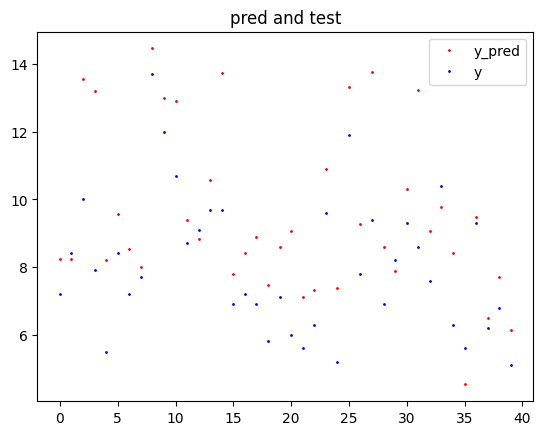

In [ ]:
# 預測值與其對應實際值點狀圖
item = range(len(y))


plt.plot(item, y_pred, 'o', markersize=1, color='r', label='y_pred')

plt.plot(item, y, 'o', markersize=1, color='b', label='y')
plt.title('pred and test')
plt.legend()
plt.show()

In [ ]:
# 每一筆資料誤差值
print("誤差值")
difference = []

for ii in range(len(y_pred)):
  d = float(y[ii]) - float(y_pred[ii])
  print(d)
  difference.append(d)

誤差值
-1.025788116455078
0.15104999542236364
-3.5636415481567383
-5.289435958862304
-2.6966724395751953
-1.1577182769775387
-1.3366668701171873
-0.29269580841064435
-0.7595241546630866
-0.9892902374267578
-2.201156425476075
-0.6814411163330085
0.2617507934570309
-0.8783386230468757
-4.024155426025391
-0.8961320877075192
-1.2064903259277342
-1.9846740722656246
-1.6734439849853517
-1.4869350433349613
-3.056304931640625
-1.5278076171875004
-1.0210582733154299
-1.3065446853637699
-2.1690271377563475
-1.412414169311523
-1.475927543640137
-4.375672912597656
-1.6906352996826168
0.3051473617553704
-1.0066530227661126
-4.618476295471192
-1.464146995544434
0.6287902832031254
-2.1045791625976564
1.0711341857910153
-0.16862411499023366
-0.28021507263183576
-0.8999778747558596
-1.0514244079589847


In [ ]:
difference

[-1.025788116455078,
 0.15104999542236364,
 -3.5636415481567383,
 -5.289435958862304,
 -2.6966724395751953,
 -1.1577182769775387,
 -1.3366668701171873,
 -0.29269580841064435,
 -0.7595241546630866,
 -0.9892902374267578,
 -2.201156425476075,
 -0.6814411163330085,
 0.2617507934570309,
 -0.8783386230468757,
 -4.024155426025391,
 -0.8961320877075192,
 -1.2064903259277342,
 -1.9846740722656246,
 -1.6734439849853517,
 -1.4869350433349613,
 -3.056304931640625,
 -1.5278076171875004,
 -1.0210582733154299,
 -1.3065446853637699,
 -2.1690271377563475,
 -1.412414169311523,
 -1.475927543640137,
 -4.375672912597656,
 -1.6906352996826168,
 0.3051473617553704,
 -1.0066530227661126,
 -4.618476295471192,
 -1.464146995544434,
 0.6287902832031254,
 -2.1045791625976564,
 1.0711341857910153,
 -0.16862411499023366,
 -0.28021507263183576,
 -0.8999778747558596,
 -1.0514244079589847]

In [ ]:
len(difference)

40

In [ ]:
#test difference 標準差

print("test difference : " + str(difference))

st_dif = np.std(difference)

print("Standard deviation of the test difference: " + str(st_dif))

test difference : [-1.025788116455078, 0.15104999542236364, -3.5636415481567383, -5.289435958862304, -2.6966724395751953, -1.1577182769775387, -1.3366668701171873, -0.29269580841064435, -0.7595241546630866, -0.9892902374267578, -2.201156425476075, -0.6814411163330085, 0.2617507934570309, -0.8783386230468757, -4.024155426025391, -0.8961320877075192, -1.2064903259277342, -1.9846740722656246, -1.6734439849853517, -1.4869350433349613, -3.056304931640625, -1.5278076171875004, -1.0210582733154299, -1.3065446853637699, -2.1690271377563475, -1.412414169311523, -1.475927543640137, -4.375672912597656, -1.6906352996826168, 0.3051473617553704, -1.0066530227661126, -4.618476295471192, -1.464146995544434, 0.6287902832031254, -2.1045791625976564, 1.0711341857910153, -0.16862411499023366, -0.28021507263183576, -0.8999778747558596, -1.0514244079589847]
Standard deviation of the test difference: 1.3887931519323795


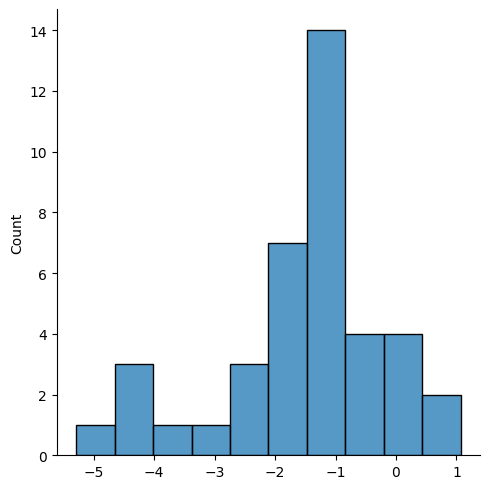

In [ ]:
# 各誤差值區間個數長條圖
import seaborn as sns
x = difference
sns.displot(x,aspect = 1)

In [ ]:
# LR模型R^2
r = r2_score(y,y_pred)

print(r)

-0.05415303568038987


In [ ]:
# LR模型偏差值(截距)
model.intercept_

17.300451

In [ ]:
# LR模型各項特徵係數
model.coef_

array([-2.1274195 , -3.6382778 ,  0.22809756,  0.4887582 , -0.03903604,
        0.28575063], dtype=float32)

In [ ]:
# LR模型特徵係數個數
len(model.coef_)

6

# **輸出模型預測結果CSV**




In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/OysterData_測試數據集_40筆.csv")
df

In [ ]:
yy = df.iloc[:,:].values

In [ ]:
yy_test = yy

In [ ]:
yy_test

In [ ]:
len(yy_test)

40

In [ ]:
# 測試LR模型結果表輸出
import csv
with open("測試LR模型結果(20240515_sklearn_linear_model_OriginalData(130)_AllFeature_UnincludeRightShellLength).csv", "w", newline="") as csvfile:
  writer = csv.writer(csvfile)

  writer.writerow(["牡蠣索引 Oyster Index",	"牡蠣編號 Oyster Number",	"牡蠣原始編號 Oyster Original Number",	"殼長 Shell Length",	"殼寬 Shell Width",	"殼高 Shell Height",	"面積 Area",	"體積 Volume",	"總重量 Total Weight",	"殼重 Shell Weight",	"肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%)",	"雜質重 Impurity Weight",	"肉重 Meat Weight", "準確值 Accurate value", "預測值 Predicted value", "誤差值 Error value"])
  for ind in range(len(yy_test)):
    yy_test_ind = list(yy_test[ind])

    yy_test_ind.append(y[ind]) #準確值
    yy_test_ind.append(float(y_pred[ind])) #預測值
    yy_test_ind.append(float(y[ind] - y_pred[ind])) #誤差值
    writer.writerow(yy_test_ind)

  writer.writerow(["Standard deviation of the test difference:", np.std(difference)])



    # writer.writerow([1, 2, 3])
    # writer.writerow([4, 5, 6])
    # writer.writerow([7, 8, 9])

In [ ]:
import csv
with open("測試LR模型結果(20240515_sklearn_linear_model_OriginalData(130)_AllFeature_UnincludeRightShellLength).csv", "r", newline="") as csvfile:
  reader = csv.reader(csvfile)
  for row in reader:
    print(row) # row 是 List 的型態，可以用 print(row[0], row[1], row[2]) 分別取得印出

In [ ]:
# 測試LR模型結果表
df_test = pd.read_csv("測試LR模型結果(20240515_sklearn_linear_model_OriginalData(130)_AllFeature_UnincludeRightShellLength).csv")
df_test

# **依據實際重量由小到大排序與預測重量分析**

In [ ]:
def BubbleSort(data,data2):
    n = len(data)
    while n > 1:
        n-=1
        for i in range(n):
            if data[i] > data[i+1]:
                data[i], data[i+1] = data[i+1], data[i]
                data2[i], data2[i+1] = data2[i+1], data2[i]
    return data,data2

In [ ]:
y.shape

(40,)

In [ ]:
y

array([ 7.2,  8.4, 10. ,  7.9,  5.5,  8.4,  7.2,  7.7, 13.7, 12. , 10.7,
        8.7,  9.1,  9.7,  9.7,  6.9,  7.2,  6.9,  5.8,  7.1,  6. ,  5.6,
        6.3,  9.6,  5.2, 11.9,  7.8,  9.4,  6.9,  8.2,  9.3,  8.6,  7.6,
       10.4,  6.3,  5.6,  9.3,  6.2,  6.8,  5.1])

In [ ]:
y_pred.shape

(40,)

In [ ]:
y_pred

array([ 8.225788 ,  8.24895  , 13.563642 , 13.189436 ,  8.196672 ,
        9.557718 ,  8.536667 ,  7.992696 , 14.459524 , 12.98929  ,
       12.901156 ,  9.381441 ,  8.838249 , 10.578339 , 13.724155 ,
        7.796132 ,  8.40649  ,  8.884674 ,  7.473444 ,  8.586935 ,
        9.056305 ,  7.1278076,  7.3210583, 10.906545 ,  7.369027 ,
       13.312414 ,  9.275928 , 13.775673 ,  8.590635 ,  7.8948526,
       10.306653 , 13.218476 ,  9.064147 ,  9.77121  ,  8.404579 ,
        4.528866 ,  9.468624 ,  6.480215 ,  7.699978 ,  6.1514244],
      dtype=float32)

In [ ]:
y_test_sort = y.reshape(y.shape[0])
y_pred_sort = y_pred.reshape(y_pred.shape[0])

In [ ]:
y_test_sort.shape

(40,)

In [ ]:
y_pred_sort.shape

(40,)

In [ ]:
y_test_sort

array([ 7.2,  8.4, 10. ,  7.9,  5.5,  8.4,  7.2,  7.7, 13.7, 12. , 10.7,
        8.7,  9.1,  9.7,  9.7,  6.9,  7.2,  6.9,  5.8,  7.1,  6. ,  5.6,
        6.3,  9.6,  5.2, 11.9,  7.8,  9.4,  6.9,  8.2,  9.3,  8.6,  7.6,
       10.4,  6.3,  5.6,  9.3,  6.2,  6.8,  5.1])

In [ ]:
y_pred_sort

array([ 8.225788 ,  8.24895  , 13.563642 , 13.189436 ,  8.196672 ,
        9.557718 ,  8.536667 ,  7.992696 , 14.459524 , 12.98929  ,
       12.901156 ,  9.381441 ,  8.838249 , 10.578339 , 13.724155 ,
        7.796132 ,  8.40649  ,  8.884674 ,  7.473444 ,  8.586935 ,
        9.056305 ,  7.1278076,  7.3210583, 10.906545 ,  7.369027 ,
       13.312414 ,  9.275928 , 13.775673 ,  8.590635 ,  7.8948526,
       10.306653 , 13.218476 ,  9.064147 ,  9.77121  ,  8.404579 ,
        4.528866 ,  9.468624 ,  6.480215 ,  7.699978 ,  6.1514244],
      dtype=float32)

In [ ]:
BubbleSort(y_test_sort,y_pred_sort)

print(y_test_sort)
print(y_pred_sort)

[ 5.1  5.2  5.5  5.6  5.6  5.8  6.   6.2  6.3  6.3  6.8  6.9  6.9  6.9
  7.1  7.2  7.2  7.2  7.6  7.7  7.8  7.9  8.2  8.4  8.4  8.6  8.7  9.1
  9.3  9.3  9.4  9.6  9.7  9.7 10.  10.4 10.7 11.9 12.  13.7]
[ 6.1514244  7.369027   8.196672   7.1278076  4.528866   7.473444
  9.056305   6.480215   7.3210583  8.404579   7.699978   7.796132
  8.884674   8.590635   8.586935   8.225788   8.536667   8.40649
  9.064147   7.992696   9.275928  13.189436   7.8948526  8.24895
  9.557718  13.218476   9.381441   8.838249  10.306653   9.468624
 13.775673  10.906545  10.578339  13.724155  13.563642   9.77121
 12.901156  13.312414  12.98929   14.459524 ]


In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

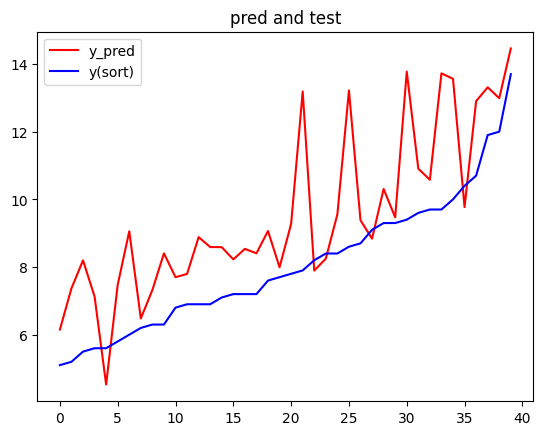

In [ ]:
# 預測值與其對應實際值折線圖(依據實際重量由小到大排序)
item = range(len(y))

# plt.plot(epochs,acc, 'b', label='Training accuracy')
# plt.plot(epochs, val_acc, 'r', label='validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc='lower right')
# plt.figure()

plt.plot(item, y_pred, 'r', label='y_pred')
# plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.plot(item, y, 'b', label='y(sort)')
plt.title('pred and test')
plt.legend()
plt.show()